# Clustering

Dans cet essai qui constitue le baseline des clusters pour le jeu de données, 

- Toutes les variables disponibles sont utilisées
- L'algorithme du k-means est utilisé (même si les variables ne sont pas tout à fait adéquates pour ce genre de méthode étant donné qu'elles sont binaires et ordinales plutôt que continues)

À la fin de cette étape, nous aurons : 

- Les valeurs des moyennes et ecart-type pour le scaling des variables (`03_pilot1_scale_origins.rds` et `03_pilot1_scale_ecarts_types.rds`)
- Le modèle de k-means (`03_pilot1_kmeans.rds`)
- Le fichier de données original augmenté des variables de cluster (`03_pilot1_2022.rds`)
- Un fichier csv (pour ouverture dans excel par exemple) qui contient la moyenne par cluster par variable afin de déterminer "à la main" quels sont les éléments distinctifs de chaque cluster (`03_pilot1_clusters_desc.csv`)

In [116]:
library(dplyr)
library(factoextra)

df_pilot_2025 <- readRDS(file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/02_pilot_2025.rds")

In [117]:
# Sélection des variables pour le clustering
source("03-0_variables.R")
df_pilot_2025_clust <- df_pilot_2025 %>% select(all_of(variables_clust)) %>% select(-id)

In [118]:
# Scaling des variables
df_scaled <- scale(df_pilot_2025_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

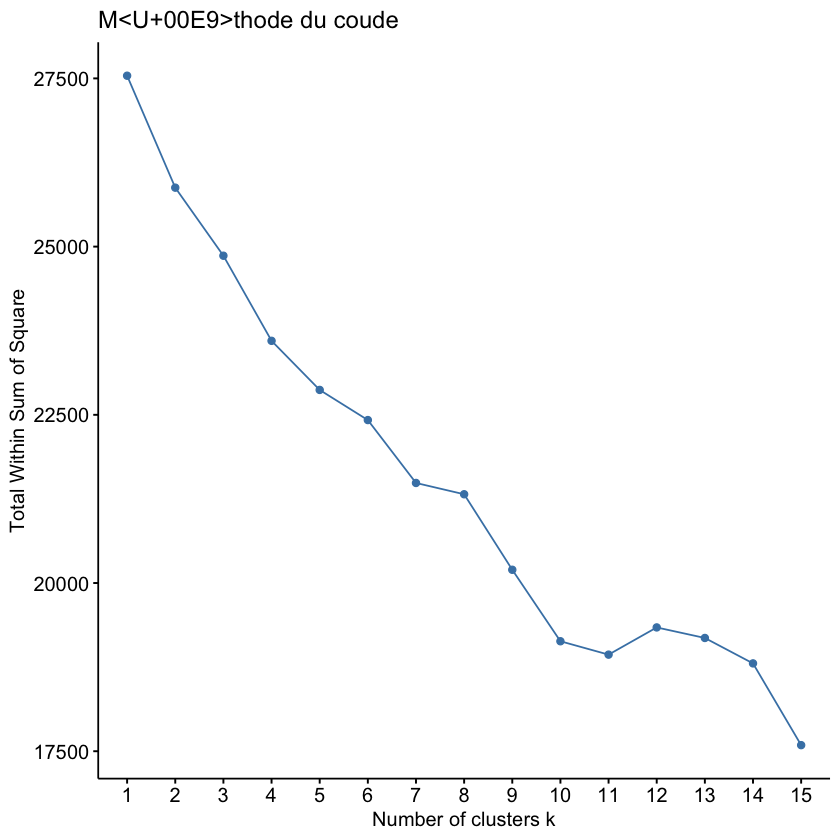

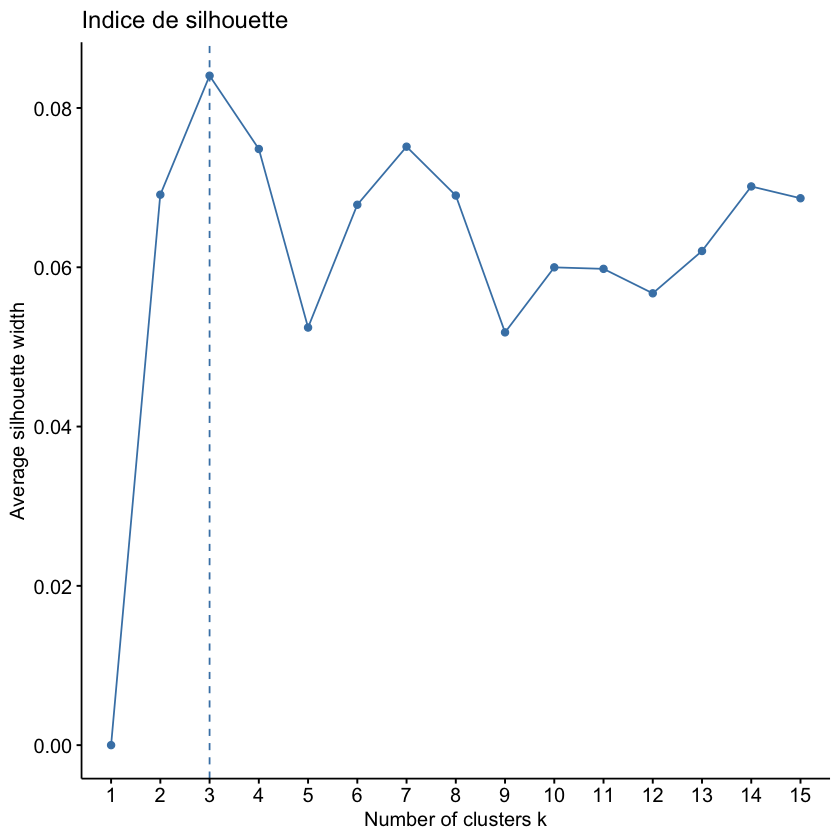

In [119]:
# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss", k.max = 15) +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette", k.max = 15) +
  ggtitle("Indice de silhouette")

In [125]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 7

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [126]:
kmeans_result

K-means clustering with 7 clusters of sizes 242, 80, 111, 41, 68, 151, 328

Cluster means:
  lifestyle_exerciseGym lifestyle_exerciseYoga lifestyle_exerciseNone
1            0.24852877             0.13612291             -0.3126558
2           -0.44830730            -0.14832550              3.1952732
3            0.27513470             0.16174889             -0.2494498
4           -0.05658992            -0.14832550              0.1151404
5            0.14214904             0.05413484             -0.1063070
6            0.04804099            -0.05715131             -0.3126558
7           -0.21164472            -0.08536527             -0.3126558
  lifestyle_goHuntingFreq_numeric lifestyle_clothingStyleOther
1                      0.46902643                   -0.2044401
2                     -0.16855938                   -0.2044401
3                      0.09410930                   -0.2044401
4                      0.02652867                    4.8866173
5                     -0.24444752 

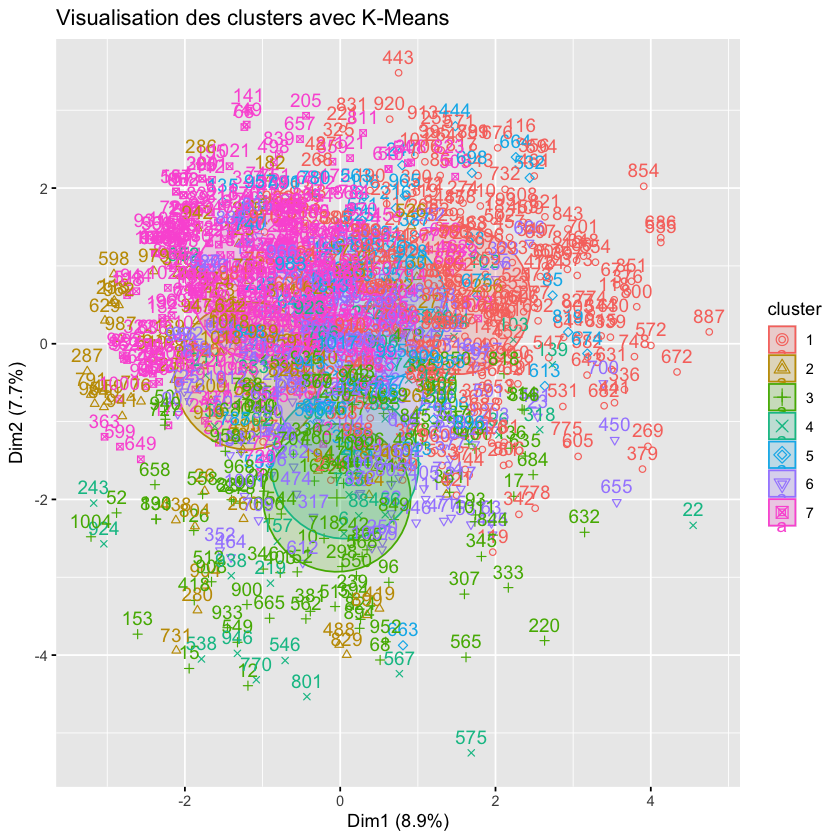

In [127]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [128]:
library(dplyr)
library(tidyr)

# Ajouter les clusters au dataframe original
df_pilot_2025$cluster <- as.factor(kmeans_result$cluster)

# Préparer les données pour pouvoir donner des noms aux clusters
df_pilot_2025 <- df_pilot_2025 %>%
  mutate(cluster_name = as.character(cluster))

# Créer des variables dummy
# Liste des clusters
clusters_uniques <- unique(df_pilot_2025$cluster)
# Création des variables
for (i in clusters_uniques) {
  df_pilot_2025[[paste0("cluster_", i)]] <- ifelse(df_pilot_2025$cluster == i, 1, 0)
}

In [129]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_origins.rds")
saveRDS(ecarts_types, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_kmeans.rds")
saveRDS(df_pilot_2025, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_2025.rds")